In [1]:
# Notebook 6 - looking at if I can use linear regression to create 
# a model

In [2]:
#import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression     
from sklearn.model_selection import train_test_split  
import seaborn as sns                                    
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/df_all.csv")

In [4]:
df.head(2)

,dateTime,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
0,2023-03-31 00:00:00,31/03/2023,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900.0,m,instantaneous,0.984
1,2023-03-31 01:00:00,31/03/2023,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900.0,m,instantaneous,1.104


In [5]:
df.dateTime.nunique()

31081

In [6]:
df.dateTime.value_counts()

dateTime
2023-03-31 00:00:00    3
2023-10-19 11:30:00    3
2023-10-19 04:30:00    3
2023-10-19 04:45:00    3
2023-10-19 03:30:00    3
                      ..
2024-02-19 18:45:00    1
2024-02-19 17:00:00    1
2024-02-19 17:15:00    1
2024-02-19 17:30:00    1
2024-02-02 04:45:00    1
Name: count, Length: 31081, dtype: int64

In [7]:
badtime = df.dateTime.value_counts().index[0]

In [8]:
df.query('dateTime == @badtime')

,dateTime,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
0,2023-03-31 00:00:00,31/03/2023,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900.0,m,instantaneous,0.984
96,2023-03-31 00:00:00,31/03/2023,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Upton Hellions,45136,level,Stage,NaN,900.0,m,instantaneous,1.129
192,2023-03-31 00:00:00,31/03/2023,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Yeoford,45137,level,Stage,NaN,900.0,m,instantaneous,0.928


In [9]:
df.tail(2)

,dateTime,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
88312,2024-02-29 04:45:00,2024-02-29,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Yeoford,45137,level,Stage,NaN,900.0,m,instantaneous,0.583
88313,2024-02-29 06:00:00,2024-02-29,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Yeoford,45137,level,Stage,NaN,900.0,m,instantaneous,0.584


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88314 entries, 0 to 88313
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          88314 non-null  object 
 1   date              88314 non-null  object 
 2   measure           88314 non-null  object 
 3   station           88314 non-null  object 
 4   label             88314 non-null  object 
 5   stationReference  88314 non-null  int64  
 6   parameter         88314 non-null  object 
 7   qualifier         88314 non-null  object 
 8   datumType         0 non-null      float64
 9   period            88314 non-null  float64
 10  unitName          88314 non-null  object 
 11  valueType         88314 non-null  object 
 12  value             88286 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 8.8+ MB


In [11]:
# lets drop excess columns

In [12]:
df_short = df[["dateTime", "label", "stationReference", "value"]].copy()

In [13]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88314 entries, 0 to 88313
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          88314 non-null  object 
 1   label             88314 non-null  object 
 2   stationReference  88314 non-null  int64  
 3   value             88286 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [14]:
mask_for_cowley = df_short["stationReference"] == 45117
dfcowley = df_short[mask_for_cowley]
mask_for_upton = df_short["stationReference"] == 45136
dfupton = df_short[mask_for_upton]
mask_for_yeoford = df_short["stationReference"] == 45137
dfyeoford = df_short[mask_for_yeoford]
dfcowley.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31046 entries, 0 to 85335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          31046 non-null  object 
 1   label             31046 non-null  object 
 2   stationReference  31046 non-null  int64  
 3   value             31018 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
# NOTE change the start date as more dates are added to the series

all_times_index = pd.date_range("2023-03-31 00:00:00", 
                                "2024-02-29 23:45:00", 
                                freq="15min")
all_times = all_times_index.to_frame(index = False,
                                     name = "all_times")

In [16]:
dfyeoford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28343 entries, 192 to 88313
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          28343 non-null  object 
 1   label             28343 non-null  object 
 2   stationReference  28343 non-null  int64  
 3   value             28343 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [17]:
# Initial failing to convert to datetime due to first two months 
# having a different format.  Two choices, mask here or do it with 
# the individual month files and then reocombine.  The latter seems 
# easier, so created notebook 3a to convert the date structure.


dfyeoford["dateTime"] = pd.to_datetime(dfyeoford["dateTime"], 
                                       format='%Y-%m-%d %H:%M:%S')
dfcowley["dateTime"] = pd.to_datetime(dfcowley["dateTime"], 
                                      format='%Y-%m-%d %H:%M:%S')
dfupton["dateTime"] = pd.to_datetime(dfupton["dateTime"],
                                     format='%Y-%m-%d %H:%M:%S')

dfupton.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28925 entries, 96 to 86824
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          28925 non-null  datetime64[ns]
 1   label             28925 non-null  object        
 2   stationReference  28925 non-null  int64         
 3   value             28925 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


C:\Users\suzan\AppData\Local\Temp\ipykernel_20888\3843005463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyeoford["dateTime"] = pd.to_datetime(dfyeoford["dateTime"],
C:\Users\suzan\AppData\Local\Temp\ipykernel_20888\3843005463.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcowley["dateTime"] = pd.to_datetime(dfcowley["dateTime"],
C:\Users\suzan\AppData\Local\Temp\ipykernel_20888\3843005463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [18]:
dfyeoford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28343 entries, 192 to 88313
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          28343 non-null  datetime64[ns]
 1   label             28343 non-null  object        
 2   stationReference  28343 non-null  int64         
 3   value             28343 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [19]:
dfcowley.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31046 entries, 0 to 85335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          31046 non-null  datetime64[ns]
 1   label             31046 non-null  object        
 2   stationReference  31046 non-null  int64         
 3   value             31018 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [20]:
all_times_yeoford = all_times.merge(dfyeoford, how = "left", 
                                    left_on = "all_times", 
                                    right_on = "dateTime")
all_times_upton = all_times.merge(dfupton, how = "left", 
                                  left_on = "all_times", 
                                  right_on = "dateTime")
all_times_cowley = all_times.merge(dfcowley, how = "left", 
                                   left_on = "all_times",
                                   right_on = "dateTime")

In [21]:
all_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   all_times  32256 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 252.1 KB


In [22]:
all_times_yeoford.head(2)

,all_times,dateTime,label,stationReference,value
0,2023-03-31 00:00:00,2023-03-31 00:00:00,Yeoford,45137.0,0.928
1,2023-03-31 00:15:00,2023-03-31 00:15:00,Yeoford,45137.0,0.965


In [23]:
all_times_upton.head(2)

,all_times,dateTime,label,stationReference,value
0,2023-03-31 00:00:00,2023-03-31 00:00:00,Upton Hellions,45136.0,1.129
1,2023-03-31 00:15:00,2023-03-31 00:15:00,Upton Hellions,45136.0,1.144


In [24]:
all_times_cowley.head(2)

,all_times,dateTime,label,stationReference,value
0,2023-03-31 00:00:00,2023-03-31 00:00:00,Cowley Bridge,45117.0,0.984
1,2023-03-31 00:15:00,2023-03-31 00:15:00,Cowley Bridge,45117.0,1.012


In [25]:
all_times_cowley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   all_times         32256 non-null  datetime64[ns]
 1   dateTime          31046 non-null  datetime64[ns]
 2   label             31046 non-null  object        
 3   stationReference  31046 non-null  float64       
 4   value             31018 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 1.2+ MB


In [26]:
all_times_yeoford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   all_times         32256 non-null  datetime64[ns]
 1   dateTime          28343 non-null  datetime64[ns]
 2   label             28343 non-null  object        
 3   stationReference  28343 non-null  float64       
 4   value             28343 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 1.2+ MB


In [27]:
all_times_upton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   all_times         32256 non-null  datetime64[ns]
 1   dateTime          28925 non-null  datetime64[ns]
 2   label             28925 non-null  object        
 3   stationReference  28925 non-null  float64       
 4   value             28925 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 1.2+ MB


In [28]:
all_time_all = all_times_yeoford.merge(all_times_upton, 
                                       how = "left", 
                                       left_on = "all_times", 
                                       right_on = "all_times")
all_time_all.head()

,all_times,dateTime_x,label_x,stationReference_x,value_x,dateTime_y,label_y,stationReference_y,value_y
0,2023-03-31 00:00:00,2023-03-31 00:00:00,Yeoford,45137.0,0.928,2023-03-31 00:00:00,Upton Hellions,45136.0,1.129
1,2023-03-31 00:15:00,2023-03-31 00:15:00,Yeoford,45137.0,0.965,2023-03-31 00:15:00,Upton Hellions,45136.0,1.144
2,2023-03-31 00:30:00,2023-03-31 00:30:00,Yeoford,45137.0,1.002,2023-03-31 00:30:00,Upton Hellions,45136.0,1.170
3,2023-03-31 00:45:00,2023-03-31 00:45:00,Yeoford,45137.0,1.052,2023-03-31 00:45:00,Upton Hellions,45136.0,1.199
4,2023-03-31 01:00:00,2023-03-31 01:00:00,Yeoford,45137.0,1.080,2023-03-31 01:00:00,Upton Hellions,45136.0,1.230


In [29]:
# need to tidy up my columns!

all_time_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   all_times           32256 non-null  datetime64[ns]
 1   dateTime_x          28343 non-null  datetime64[ns]
 2   label_x             28343 non-null  object        
 3   stationReference_x  28343 non-null  float64       
 4   value_x             28343 non-null  float64       
 5   dateTime_y          28925 non-null  datetime64[ns]
 6   label_y             28925 non-null  object        
 7   stationReference_y  28925 non-null  float64       
 8   value_y             28925 non-null  float64       
dtypes: datetime64[ns](3), float64(4), object(2)
memory usage: 2.2+ MB


In [30]:
# drop excess columns

all_time_all_short = all_time_all[["all_times", "value_x", 
                                   "value_y"]].copy()
all_time_all_short.head()

,all_times,value_x,value_y
0,2023-03-31 00:00:00,0.928,1.129
1,2023-03-31 00:15:00,0.965,1.144
2,2023-03-31 00:30:00,1.002,1.170
3,2023-03-31 00:45:00,1.052,1.199
4,2023-03-31 01:00:00,1.080,1.230


In [31]:
# Much neater
# rename the columns I have left

all_time_all_short.rename(columns = {"value_x":"Yeoford_value"}, 
                          inplace = True)
all_time_all_short.rename(columns = {"value_y":"Upton_value"}, 
                          inplace = True)
all_time_all_short.head(2)

,all_times,Yeoford_value,Upton_value
0,2023-03-31 00:00:00,0.928,1.129
1,2023-03-31 00:15:00,0.965,1.144


In [32]:
all_times_cowley.head(2)

,all_times,dateTime,label,stationReference,value
0,2023-03-31 00:00:00,2023-03-31 00:00:00,Cowley Bridge,45117.0,0.984
1,2023-03-31 00:15:00,2023-03-31 00:15:00,Cowley Bridge,45117.0,1.012


In [33]:
all_times_cowley.rename(columns = {"value":"Cowley_value"}, 
                        inplace = True)

In [34]:
all_times_cowley.drop("stationReference", axis = "columns", 
                      inplace = True)

In [35]:
all_times_cowley.drop("dateTime", axis = "columns", inplace = True)

In [36]:
all_times_cowley.drop("label", axis = "columns", inplace = True)

In [37]:
all_times_cowley.info()  
# this is slimmed down to the mimimum info needed to add to the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   all_times     32256 non-null  datetime64[ns]
 1   Cowley_value  31018 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 504.1 KB


In [38]:
all_time_all_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   all_times      32256 non-null  datetime64[ns]
 1   Yeoford_value  28343 non-null  float64       
 2   Upton_value    28925 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 756.1 KB


In [39]:
all_time_all_short = all_time_all_short.merge(all_times_cowley, 
                                              how = "left", 
                                              left_on = "all_times",
                                              right_on = "all_times"
                                             )
all_time_all_short.head(2)

,all_times,Yeoford_value,Upton_value,Cowley_value
0,2023-03-31 00:00:00,0.928,1.129,0.984
1,2023-03-31 00:15:00,0.965,1.144,1.012


In [40]:
all_time_all_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   all_times      32256 non-null  datetime64[ns]
 1   Yeoford_value  28343 non-null  float64       
 2   Upton_value    28925 non-null  float64       
 3   Cowley_value   31018 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1008.1 KB


In [41]:
# There are a lot of NaNs in there.  Unfortunately if I'm going to
# be playing with modelling then models needs data without NaNs to 
# learn.  Therefore the first thing I need to do is drop NaNs.

no_nan = all_time_all_short.dropna()
no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26595 entries, 0 to 32224
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   all_times      26595 non-null  datetime64[ns]
 1   Yeoford_value  26595 non-null  float64       
 2   Upton_value    26595 non-null  float64       
 3   Cowley_value   26595 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.0 MB


In [42]:
# need to add yeoford and upton as the combined they should relate 
# to Cowley

In [43]:
no_nan["upstream"] = no_nan["Yeoford_value"]+no_nan["Upton_value"]
no_nan.head()

C:\Users\suzan\AppData\Local\Temp\ipykernel_20888\3396071727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nan["upstream"] = no_nan["Yeoford_value"]+no_nan["Upton_value"]


,all_times,Yeoford_value,Upton_value,Cowley_value,upstream
0,2023-03-31 00:00:00,0.928,1.129,0.984,2.057
1,2023-03-31 00:15:00,0.965,1.144,1.012,2.109
2,2023-03-31 00:30:00,1.002,1.170,1.040,2.172
3,2023-03-31 00:45:00,1.052,1.199,1.072,2.251
4,2023-03-31 01:00:00,1.080,1.230,1.104,2.310


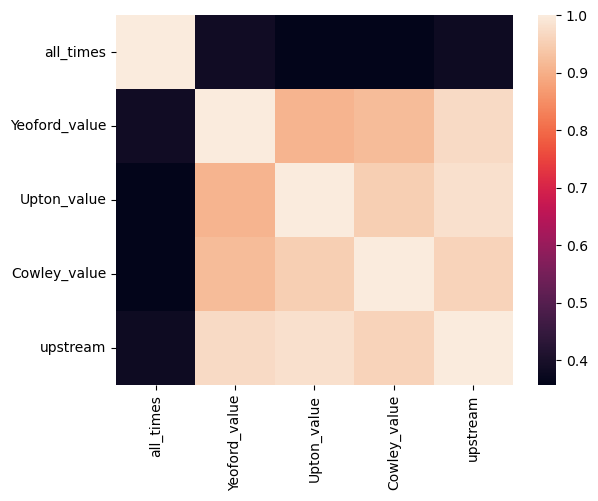

In [44]:
sns.heatmap(no_nan.corr());

In [45]:
no_nan.corr()["Cowley_value"]

all_times        0.356735
Yeoford_value    0.921517
Upton_value      0.950560
Cowley_value     1.000000
upstream         0.959674
Name: Cowley_value, dtype: float64

In [46]:
# Looking at the river levels upstream as the inputs and the river 
# level downstream as the calculated value

# inputs are Yeoford_value and Upton_value
x_inputs = no_nan.iloc[:,1:3]  
# output is Cowley_value
y_target = no_nan.iloc[:,3]             

In [47]:
x_inputs.head()   # so this is the correct 2 columns

,Yeoford_value,Upton_value
0,0.928,1.129
1,0.965,1.144
2,1.002,1.170
3,1.052,1.199
4,1.080,1.230


In [48]:
y_target.head()            

0    0.984
1    1.012
2    1.040
3    1.072
4    1.104
Name: Cowley_value, dtype: float64

In [49]:
#now we will split the dataset into two, some part for training, 
# some part of testing at 80:20 ratio

x_train_data,x_test_data,y_train_data,y_test_data = train_test_split(x_inputs,y_target,test_size=0.20)  


In [50]:
x_train_data # 20101 rows

,Yeoford_value,Upton_value
1935,0.335,0.464
21793,0.595,0.903
7033,0.226,0.260
1143,0.482,0.531
4949,0.298,0.354
...,...,...
30580,0.621,0.875
28763,0.466,0.480
14263,0.231,0.284
13371,0.215,0.241


In [51]:
x_test_data # 5026 rows

,Yeoford_value,Upton_value
7490,0.208,0.242
20459,0.373,0.528
14029,0.216,0.233
19363,0.277,0.396
30282,0.782,1.167
...,...,...
13297,0.219,0.242
13999,0.215,0.233
2031,0.324,0.438
1710,0.360,0.536


In [52]:
y_train_data # Length: 20101

1935     0.474
21793    0.865
7033     0.250
1143     0.612
4949     0.375
         ...  
30580    0.948
28763    0.601
14263    0.236
13371    0.197
1645     0.554
Name: Cowley_value, Length: 21276, dtype: float64

In [53]:
y_test_data # Length: 5026

7490     0.225
20459    0.476
14029    0.194
19363    0.310
30282    1.259
         ...  
13297    0.199
13999    0.192
2031     0.448
1710     0.536
8368     0.218
Name: Cowley_value, Length: 5319, dtype: float64

In [54]:
#now we have our training data, let's make an instance of the model
# to train and predict
L_model = LinearRegression()

# l_model is just a variable name

In [55]:
#fitting is training

L_model.fit(x_train_data,y_train_data)


LinearRegression()

In [56]:
# now that the model has been trained, let's try to make some 
# predictions, remember we have y_test they x_test values will be 
# used to predict y,and then we compare with the actual y in y_test

y_prediction = L_model.predict(x_test_data) 

In [57]:
y_prediction

array([0.22509188, 0.51220118, 0.22261281, ..., 0.4233047 , 0.51147835,
       0.22558883])

In [58]:
y_test_data   # visually compare the computer predictions 
              # y_prediction with the y_yest_data (actualy answers)

7490     0.225
20459    0.476
14029    0.194
19363    0.310
30282    1.259
         ...  
13297    0.199
13999    0.192
2031     0.448
1710     0.536
8368     0.218
Name: Cowley_value, Length: 5319, dtype: float64

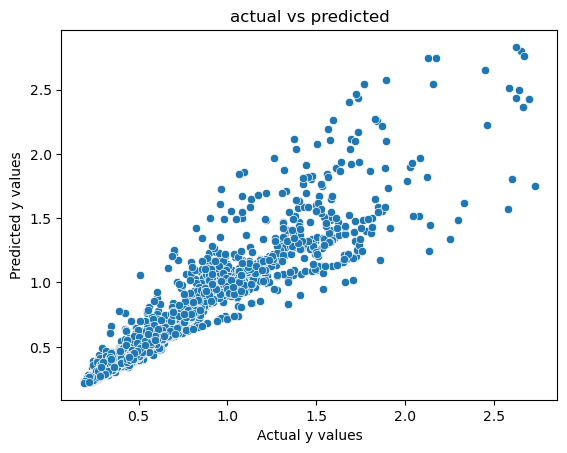

In [59]:
#create seaborn scatter plot to compare performance visually

ax = sns.scatterplot(x=y_test_data,y = y_prediction, marker='o')

#specfiy axis labels
ax.set(xlabel='Actual y values',ylabel='Predicted y values', 
       title='actual vs predicted')

#display plot
plt.show()

# the higher the values the lower the accuracy, but this is to be 
# expected as there is nothing in the data to tell the model if the
# river is going up or down. The value of Cowley is delayed 
# compared with the value of the inputs.  Can I do something 
# with that to tell the model that there is a delay of a few hours?

In [60]:
# import metrics for scoring model performance
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
# r2 score range 0-1, the closer to 1 the better the model, the 
# closer to zero the worse.  Crudely, how many predictions were 
# correct?

In [62]:
r2_score(y_test_data,y_prediction)  # 5.0 and above is better

0.9216378345086607

In [63]:
# the coefficients of each x input, in order
L_model.coef_  # this is how we see the coeffitients for the 
               # individual values

array([0.49694388, 0.71718025])

In [64]:
# the y intercept
L_model.intercept_

-0.05183006331515183

In [65]:
# From looking at individual peaks I think it takes (very) 
# approximately four hours for the water at Yeoford and Upton 
# to get to Cowley, so can I create an additional column against 
# each time stamp for the value of Cowley 4 hours later?

# I will need to go back to my df before I dropped NaNs as I may 
# well generate a few more with this!

In [66]:
# Creating a new column with a copy of the cowley data in

all_time_all_short["Cowley_4_later"] = all_time_all_short["Cowley_value"]
all_time_all_short.head()

,all_times,Yeoford_value,Upton_value,Cowley_value,Cowley_4_later
0,2023-03-31 00:00:00,0.928,1.129,0.984,0.984
1,2023-03-31 00:15:00,0.965,1.144,1.012,1.012
2,2023-03-31 00:30:00,1.002,1.170,1.040,1.040
3,2023-03-31 00:45:00,1.052,1.199,1.072,1.072
4,2023-03-31 01:00:00,1.080,1.230,1.104,1.104


In [67]:
# With 4 hours and 4 timeslots in each hour, I want to shift the 
# data by 16 steps
all_time_all_short["Cowley_4_later"] = all_time_all_short["Cowley_4_later"].shift(periods=16, axis="index")
all_time_all_short.head(20)
# so I now have a new column with Cowley as it will be in 4 hours 
# after the time (which) should mean closer match to peaks

,all_times,Yeoford_value,Upton_value,Cowley_value,Cowley_4_later
0,2023-03-31 00:00:00,0.928,1.129,0.984,NaN
1,2023-03-31 00:15:00,0.965,1.144,1.012,NaN
2,2023-03-31 00:30:00,1.002,1.170,1.040,NaN
3,2023-03-31 00:45:00,1.052,1.199,1.072,NaN
4,2023-03-31 01:00:00,1.080,1.230,1.104,NaN
5,2023-03-31 01:15:00,1.139,1.259,1.134,NaN
6,2023-03-31 01:30:00,1.157,1.297,1.173,NaN
7,2023-03-31 01:45:00,1.179,1.327,1.215,NaN
8,2023-03-31 02:00:00,1.157,1.358,1.258,NaN
9,2023-03-31 02:15:00,1.160,1.377,1.301,NaN


In [68]:
# Simply dropping all NaN rows a we can't train the model with those
new_no_nan = all_time_all_short.dropna()
new_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26284 entries, 16 to 32224
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   all_times       26284 non-null  datetime64[ns]
 1   Yeoford_value   26284 non-null  float64       
 2   Upton_value     26284 non-null  float64       
 3   Cowley_value    26284 non-null  float64       
 4   Cowley_4_later  26284 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.2 MB


In [69]:
new_no_nan.corr()["Cowley_4_later"]
# OK, so that doesn't seem to have worked as the corrolation values
# before were:
#    Yeoford_value    0.924973
#    Upton_value      0.952895
#    Name: Cowley_value, dtype: float64

# So in both cases the corrolation is less by shifting Cowley 
# Bridge by 4 hours, but as Cowley will onw be higher than it was I 
# guess that makes sense. 
# Lets follow through and try to see if the new model is more 
# accurate?

all_times         0.350667
Yeoford_value     0.843843
Upton_value       0.905684
Cowley_value      0.967776
Cowley_4_later    1.000000
Name: Cowley_4_later, dtype: float64

In [70]:
# Looking at the river levels upstream as the inputs and the river 
# level downstream timeshifted as the calculated value

# inputs are Yeoford_value and Upton_value
x2_inputs = new_no_nan.iloc[:,1:3]   
# output is Cowley_4_later
y2_target = new_no_nan.iloc[:,4]        

In [71]:
x2_inputs.head() 

,Yeoford_value,Upton_value
16,1.042,1.308
17,1.045,1.297
18,1.058,1.290
19,1.069,1.272
20,1.092,1.264


In [72]:
y2_target.head()   

16    0.984
17    1.012
18    1.040
19    1.072
20    1.104
Name: Cowley_4_later, dtype: float64

In [73]:
#now we will split the dataset into two, some part for training, 
# ome part of testing at 80:20 ratio

x2_train_data,x2_test_data,y2_train_data,y2_test_data = train_test_split(x2_inputs,y2_target,test_size=0.20)  

In [74]:
#now we have our training data, let's make an instance of the model
# to train and predict
L2_model = LinearRegression()


In [75]:
#fitting is training

L2_model.fit(x2_train_data,y2_train_data)

LinearRegression()

In [76]:
# now that the model has been trained, let's try to make some 
# predictions, remember we have y2_test they x2_test values will be
# used to predict y, and then we compare with the actual y in 
# y2_test

y2_prediction = L2_model.predict(x2_test_data) 

In [77]:
y2_prediction

array([0.24964457, 0.28817959, 0.44110433, ..., 0.54134467, 0.24085122,
       0.23055746])

In [78]:
y2_test_data   # visually compare the computer predictions 
             # y2_prediction with the y2_yest_data (actualy answers)

12521    0.206
12046    0.264
19073    0.339
3406     0.450
16479    0.329
         ...  
15266    0.198
23435    0.513
2955     0.568
8678     0.218
15400    0.194
Name: Cowley_4_later, Length: 5257, dtype: float64

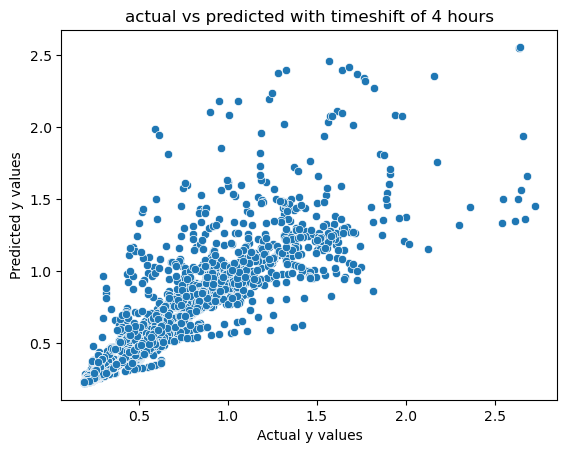

In [79]:
#create seaborn scatter plot to compare performance visually

ax = sns.scatterplot(x=y2_test_data,y = y2_prediction, marker='o')

#specfiy axis labels
ax.set(xlabel='Actual y values',ylabel='Predicted y values', 
       title='actual vs predicted with timeshift of 4 hours')

#display plot
plt.show()

# the higher the values the lower the accuracy, but this is to be 
# expected as there is nothing in the data to tell the model 
# if the river is going up or down. The value of Cowley is delayed 
# compared with the value of the inputs.  Can I do something 
# with that to tell the model that there is a delay of a few hours?

In [80]:
# The data is more spread not more linear => visually this is a 
# worse model not better

In [81]:
r2_score(y2_test_data,y2_prediction)  # 5.0 and above is better

0.8234339574065541

In [82]:
# the RMS value shows that it is a poorer model.  MY assumption 
# that this would be better was wrong I can't get more accurate 
# predictions of the river height at Cowley Brdige by using data 
# four hours delayed to model with instead of instantaineous 
# values.